# Solving the Knapsack Problem using Genetic Algorithm

#### Importing the libraries

In [11]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

#### Randomly initialize the list of items

In [12]:
item_number = np.arange(1,11)
weight = np.random.randint(1, 15, size = 10)
value = np.random.randint(10, 750, size = 10)
knapsack_threshold = 35    #Maximum weight that the bag of thief can hold 
print('The list is as follows:')
print('Item No.   Weight   Value')
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}\n'.format(item_number[i], weight[i], value[i]))

The list is as follows:
Item No.   Weight   Value
1          13         61

2          3         483

3          13         406

4          12         183

5          10         743

6          13         604

7          12         23

8          3         687

9          6         219

10          12         733



#### We declare the initial population

In [13]:
#In this problem the idea of chromosome encoding is to have a chromosome 
#consisting as many genes as there are total number of items such that 
#each gene index corresponds to item index in the list. Each gene has a 
#value 1 or 0 which tells whether the corresponding item is present or not.


solutions_per_pop = 8
pop_size = (solutions_per_pop, item_number.shape[0])
print('Population size = {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
num_generations = 50
print('Initial popultaion: \n{}'.format(initial_population))

Population size = (8, 10)
Initial popultaion: 
[[1 0 1 1 0 1 1 1 1 1]
 [0 1 0 1 0 1 1 1 1 0]
 [1 1 1 1 0 0 1 0 1 0]
 [0 1 1 0 1 1 0 1 0 1]
 [1 1 0 0 0 1 0 1 0 0]
 [0 1 0 0 1 0 1 1 0 0]
 [0 1 1 1 0 1 0 0 0 1]
 [0 0 1 1 0 0 0 0 1 0]]


<blockquote>The fitness function that we will be using for this problem is as follows:
<br> fitness = $\sum_{i=1}^{n} c_iv_i$   if $\sum_{i=1}^{n} c_iw_i$ $<=kw$
<br> fitness = 0 otherwise
<br> where, n= chromosome length
<br>$c_i$ =i th gene
<br>$v_i$ =i th value
<br>$w_i$ =ith weight
<br>kw = Weight of the knapsack</blockquote>

In [14]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)

#### Selection

In [15]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

#### One-point Crossover

In [16]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.8
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings

#### Mutation using bit-flip technique

In [17]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants

#### Optimizing until the last generation

In [18]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [19]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
selected_items = item_number * parameters
print('\nSelected items that will maximize the knapsack without breaking it:')
for i in range(selected_items.shape[1]):
    if selected_items[0][i] != 0:
        print('{}\n'.format(selected_items[0][i]))

Last generation: 
[[0 1 0 0 1 0 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 1 0 0 1 0 0 1 1 0]
 [0 1 0 0 1 0 1 1 1 0]
 [0 1 0 0 1 0 1 1 1 1]
 [0 0 0 0 1 0 1 1 1 0]]

Fitness of the last generation: 
[2155 2155 2155 2155 2132 2155    0 1672]

The optimized parameters for the given inputs are: 
[array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0])]

Selected items that will maximize the knapsack without breaking it:
2

5

7

8

9



#### The Visualization

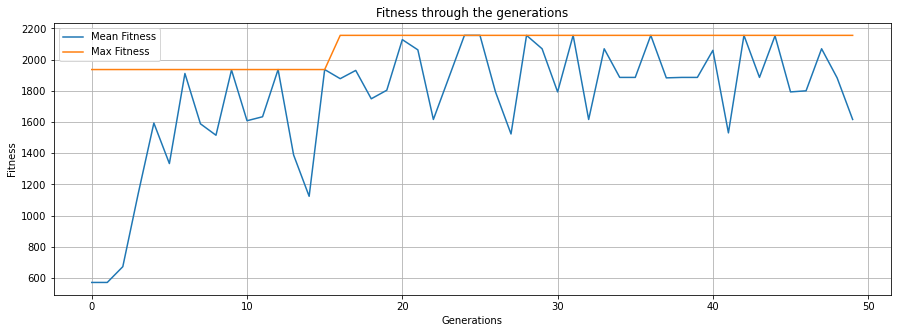

In [20]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.figure(figsize=(15,5))
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid()
plt.show()